## Internship in TechnoEduHacks


<span style="color:red"> **Machine Learning Project_Task 1**</span>


<span style="color: #26B260"> ***Author: Consolas HODONOU, Msc in Biostatistics***</span>

consolashodonou@gmail.com


<hr/> <h1 style="text-align: center;"><span style="color: #00000;"<em><strong>  PROJECT : Predicting House Prices </strong></em></span></h1><hr />

## 1- Aim of the Project

This project based on house-prices-advanced-regression-techniques and the goal is to estimate the variable SalePrice of each house. This estimation/prediction will be done through a specified model which will take into account others variables, showing the characteristics or description of these houses. This work consists to use a dataset containing information about house features to predict their sale prices.

## 2- Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix,precision_score

import warnings
warnings.filterwarnings("ignore")

## 3- Import dataset

Note: Our dataset is already splited on train_set and test_set. Then, we will use the train_set to run our model before verify its quality by using test_set.

In [2]:
data = pd.read_csv("train.csv")

## 4- Data Preprocessing

In [3]:
#Display head of dataset
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#Definition of a shape function
def shape_data(x):
    """This function takes dataset in argument and return directly a sentence about 
    number of rows and number of columns"""
    x.shape
    return(f'This dataset contains {x.shape[0]} rows and {x.shape[1]} columns.')

In [5]:
#Display shape of dataset
shape_data(data)

'This dataset contains 1460 rows and 81 columns.'

In [6]:
#Check data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
#Check NaN values
missing_columns = [col for col in data.columns if data[col].isnull().sum()!=0]
missing_columns

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [8]:
#Display columns with NaN and percentage of missing
missing = data[missing_columns].isnull().sum()
missing_percent = (missing/data.shape[0])*100
table = pd.DataFrame({"Variables":missing_columns,"Missing_Values":missing,"Percent_Missing_Values":missing_percent})
table.sort_values("Missing_Values", ascending = False)

,Variables,Missing_Values,Percent_Missing_Values
PoolQC,PoolQC,1453,99.520548
MiscFeature,MiscFeature,1406,96.301370
Alley,Alley,1369,93.767123
Fence,Fence,1179,80.753425
FireplaceQu,FireplaceQu,690,47.260274
LotFrontage,LotFrontage,259,17.739726
GarageType,GarageType,81,5.547945
GarageYrBlt,GarageYrBlt,81,5.547945
GarageFinish,GarageFinish,81,5.547945
GarageQual,GarageQual,81,5.547945


PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
       
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
       
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

## Comment

After reading the data description, we can understand that NaN values are not really unavailable, it just means absence of the target. Then, since the situation is like that we will remove some columns in order to avoid bias causes by presence of only one modality of a given target/variable.These columns are:
    
    -PoolQC: Pool quality
    
    -MiscFeature: Miscellaneous feature not covered in other categories
    
    -Alley: Type of alley access to property

In [9]:
#Handle missing values
data = data.drop(["PoolQC", "MiscFeature", "Alley"], axis = 1)

In [10]:
nofence = 'no fence'
nofirepl = 'no fireplace'
notdefined = 'Not defined'

data['Fence'].fillna(nofence, inplace = True)
data['FireplaceQu'].fillna(nofirepl, inplace =True)
data['LotFrontage'].fillna(data['LotFrontage'].median(), inplace =True)#Type int
data['GarageType'].fillna(notdefined, inplace =True)
data['GarageYrBlt'].fillna(data['GarageYrBlt'].median(), inplace =True) #Type int
data['GarageFinish'].fillna(notdefined, inplace =True)
data['GarageQual'].fillna(notdefined, inplace =True)
data['GarageCond'].fillna(notdefined, inplace =True)
data['BsmtExposure'].fillna(notdefined, inplace =True)
data['BsmtFinType2'].fillna(notdefined, inplace =True)
data['BsmtFinType1'].fillna(notdefined, inplace =True)
data['BsmtCond'].fillna(notdefined, inplace =True)
data['BsmtQual'].fillna(notdefined, inplace =True)
data['MasVnrArea'].fillna(data['MasVnrArea'].median(), inplace =True)#Type int
data['MasVnrType'].fillna(notdefined, inplace =True)
data['Electrical'].fillna(notdefined, inplace =True)

In [11]:
#Check sum of remaining NaN
data.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 78, dtype: int64

In [12]:
#Check if it remains NaN values in columns
missing_columns = [col for col in data.columns if data[col].isnull().sum()!=0]
missing_columns

[]

#### Comment

This result shows that there is no missing values again in the dataset. Then, we can go to next step which consists to find existing outliers if applicable.

### Distribution of variables

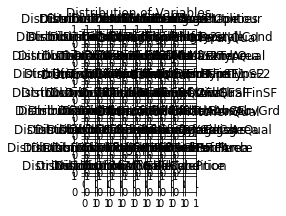

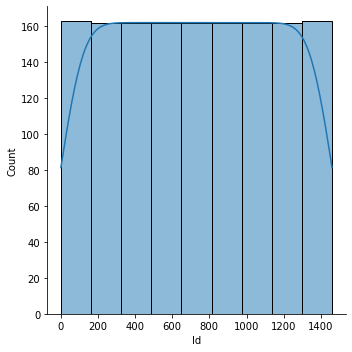

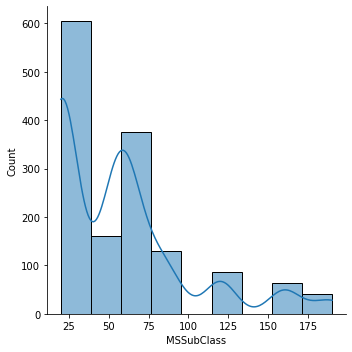

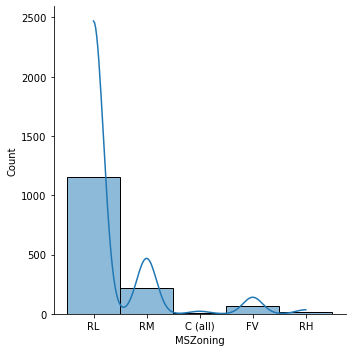

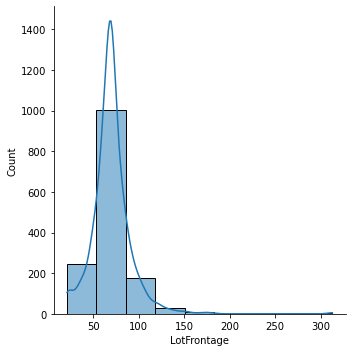

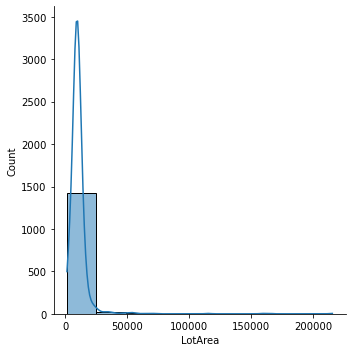

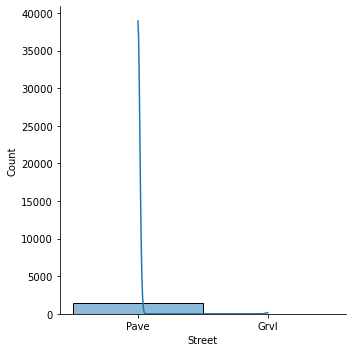

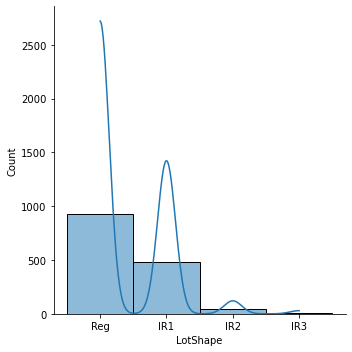

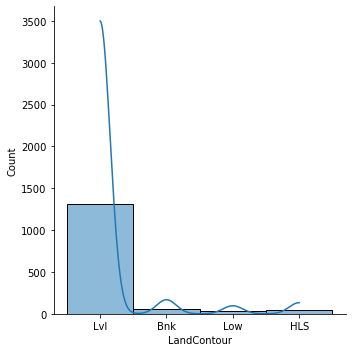

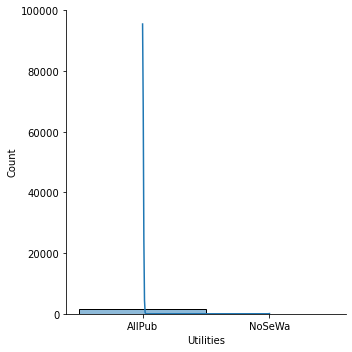

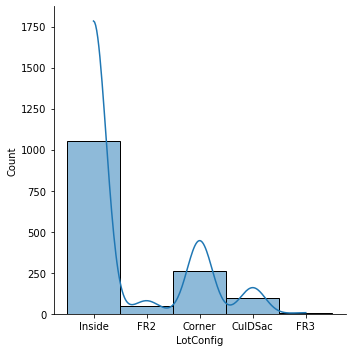

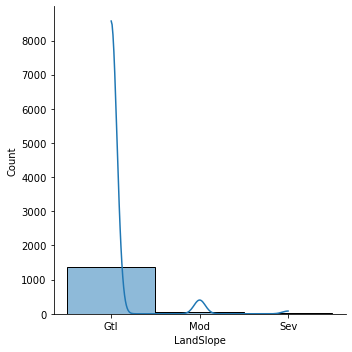

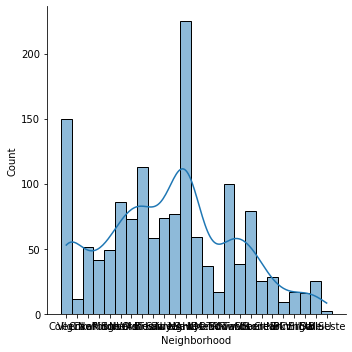

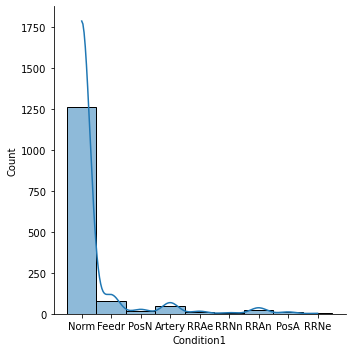

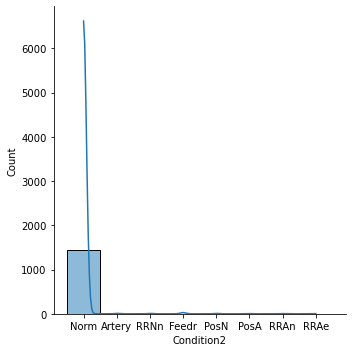

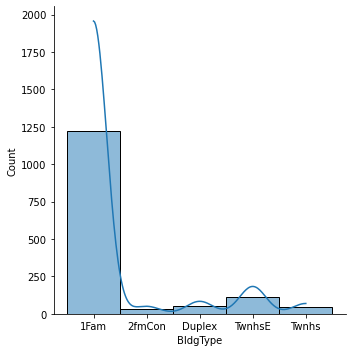

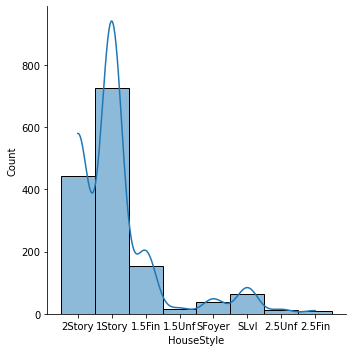

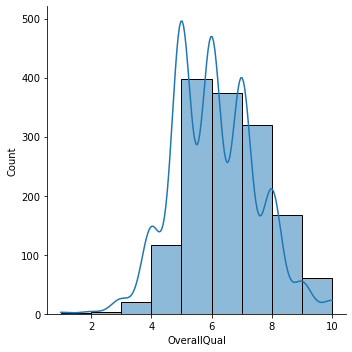

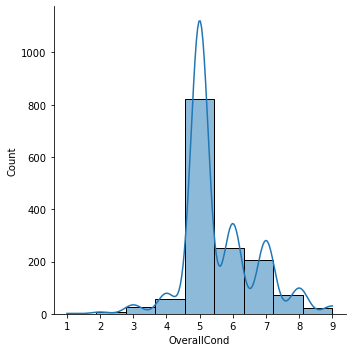

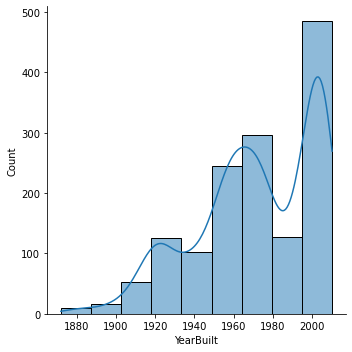

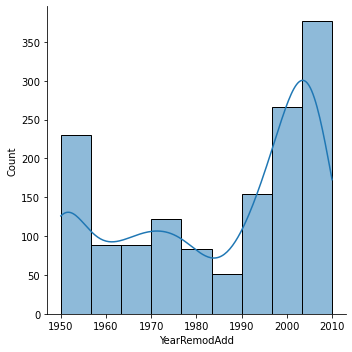

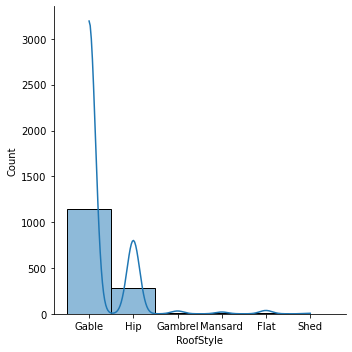

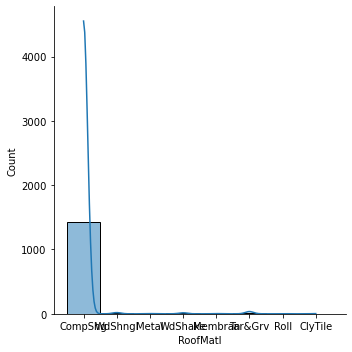

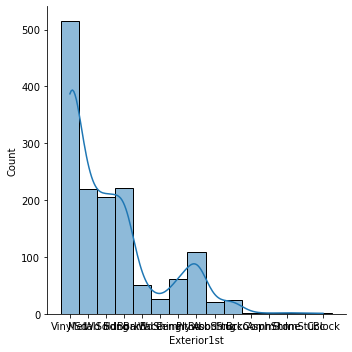

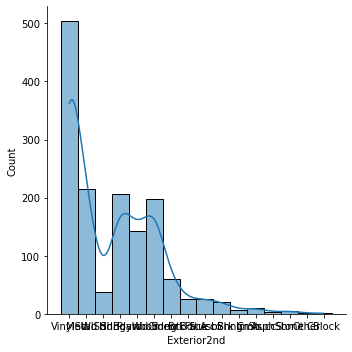

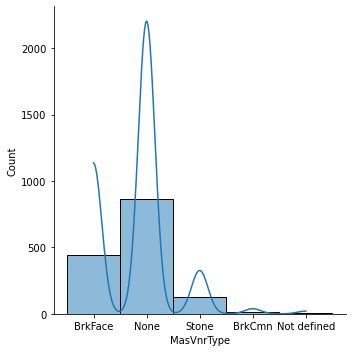

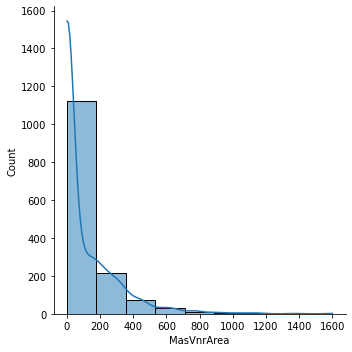

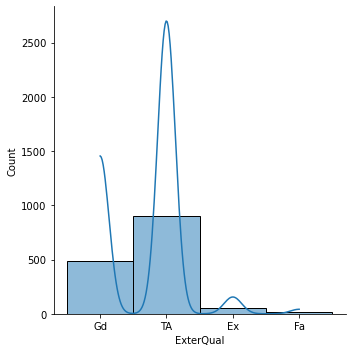

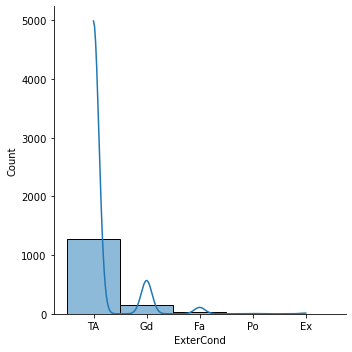

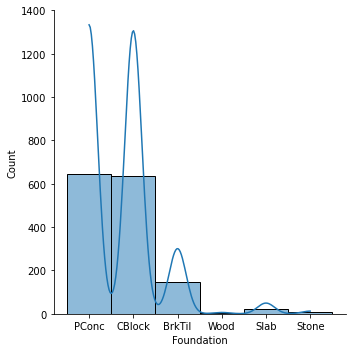

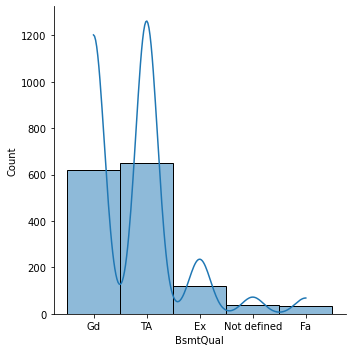

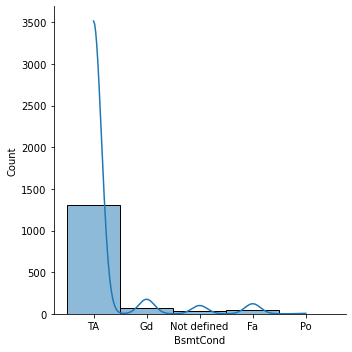

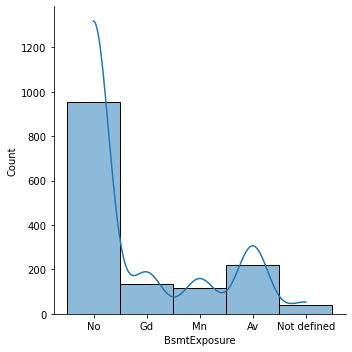

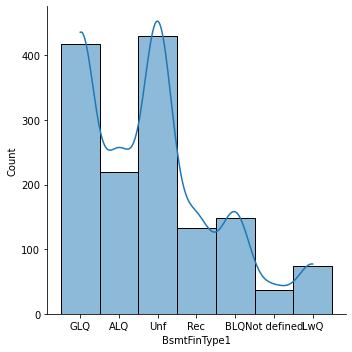

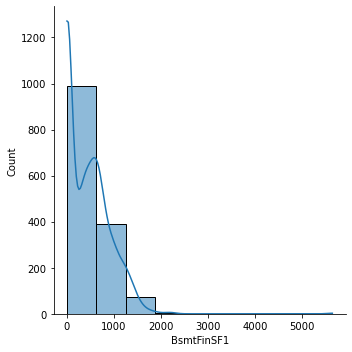

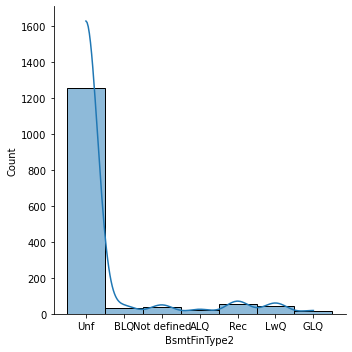

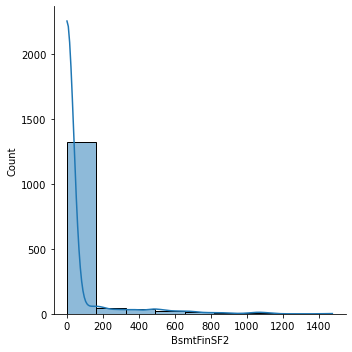

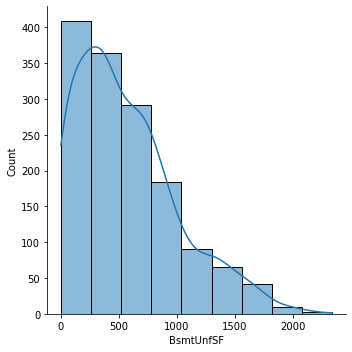

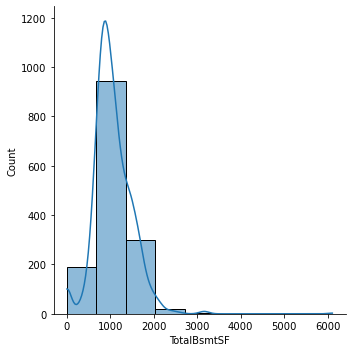

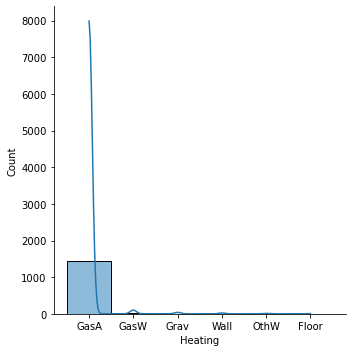

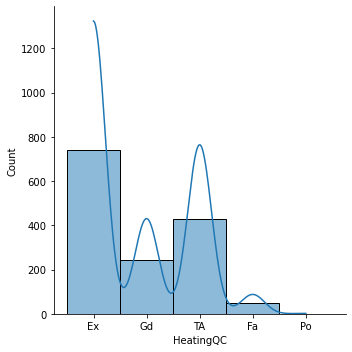

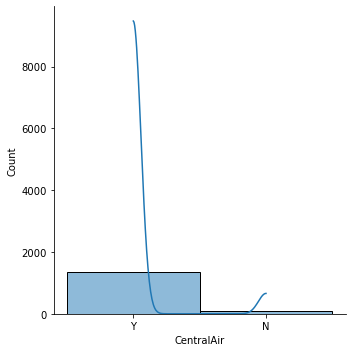

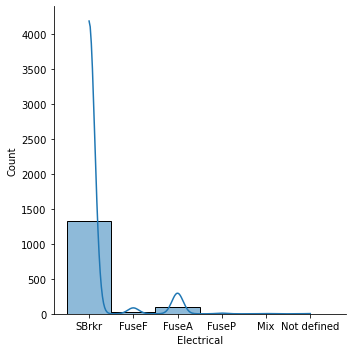

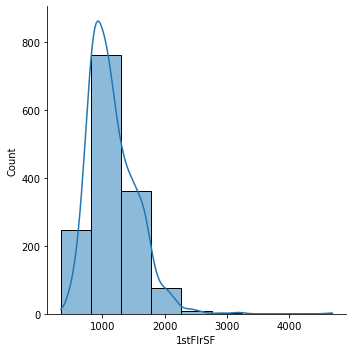

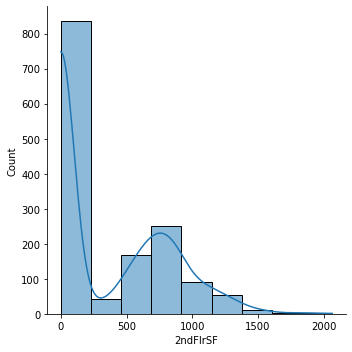

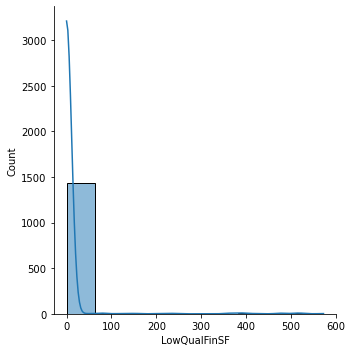

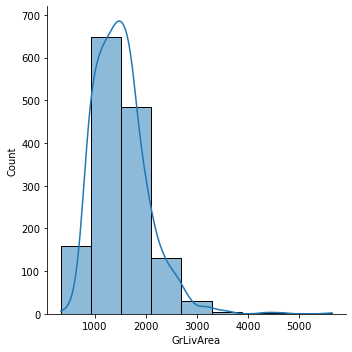

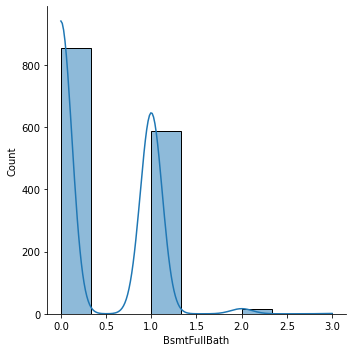

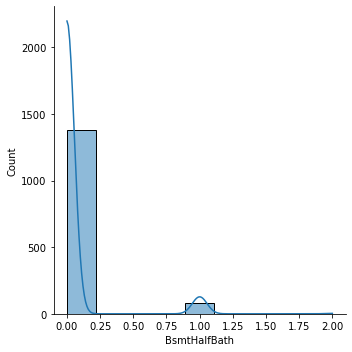

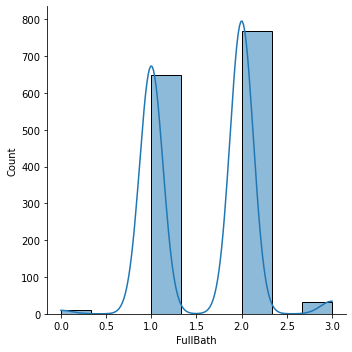

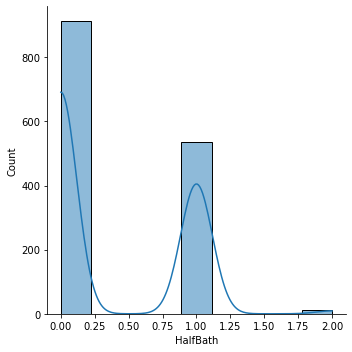

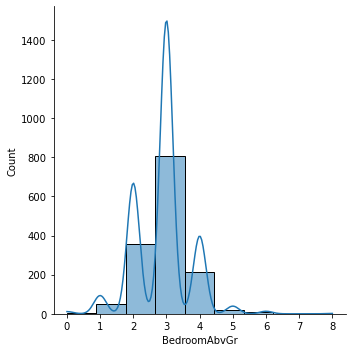

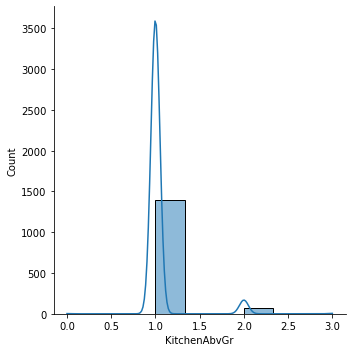

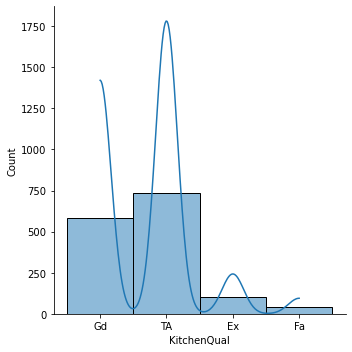

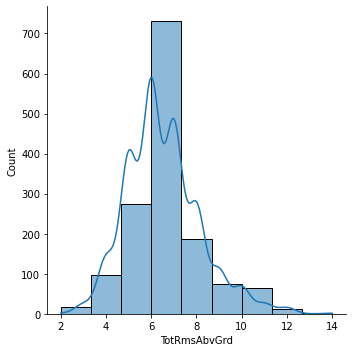

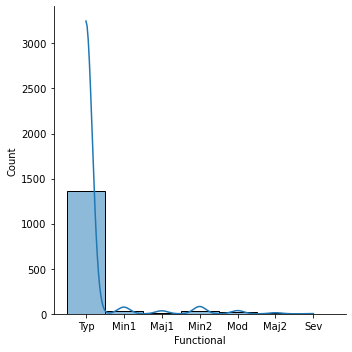

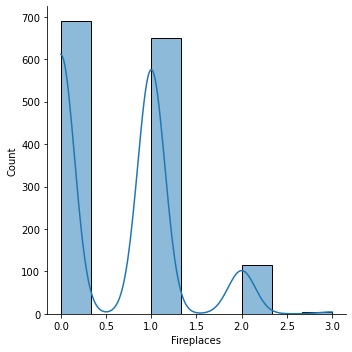

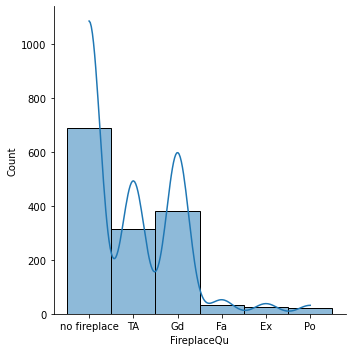

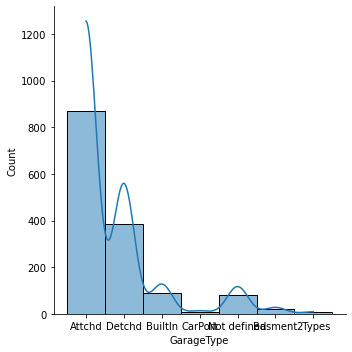

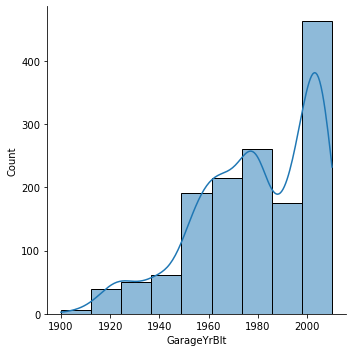

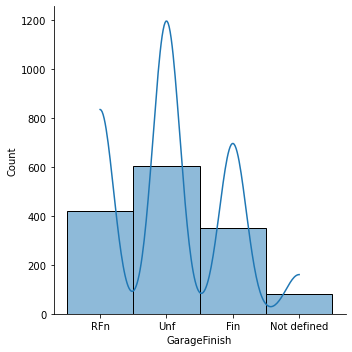

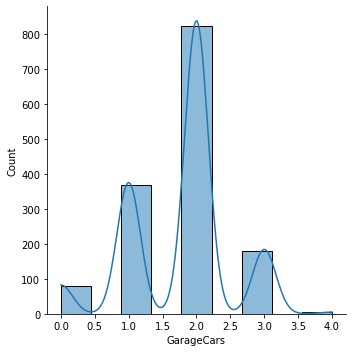

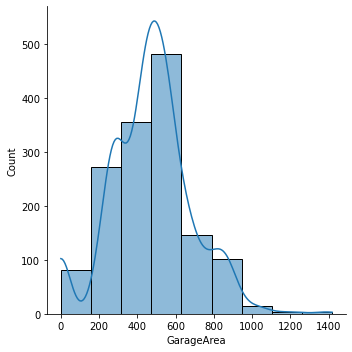

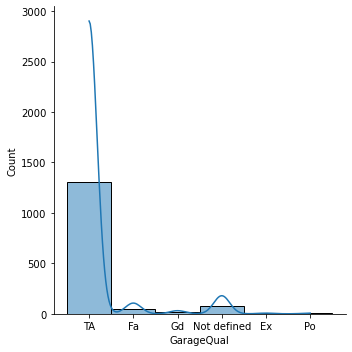

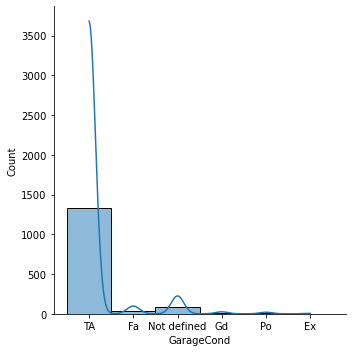

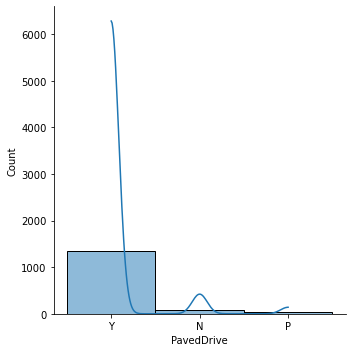

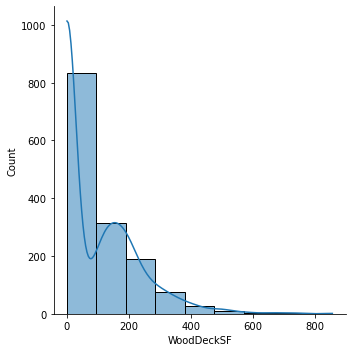

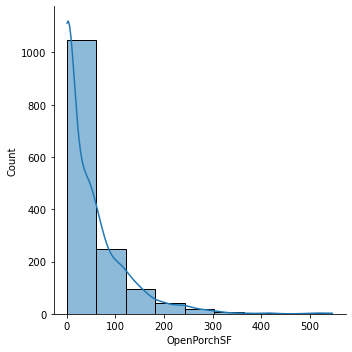

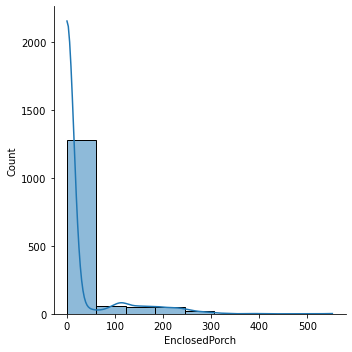

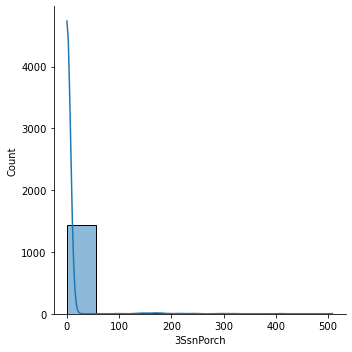

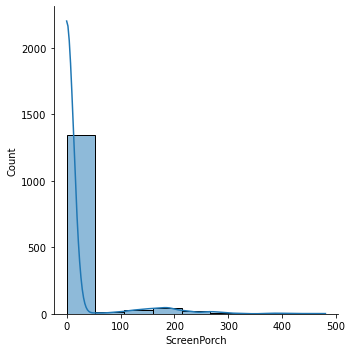

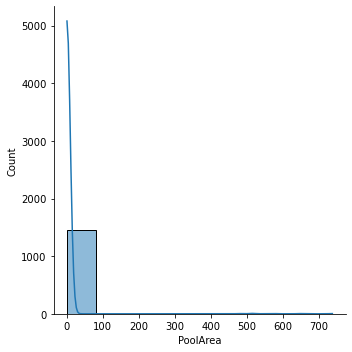

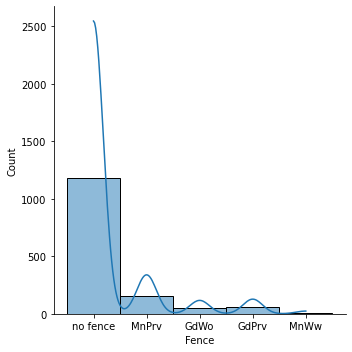

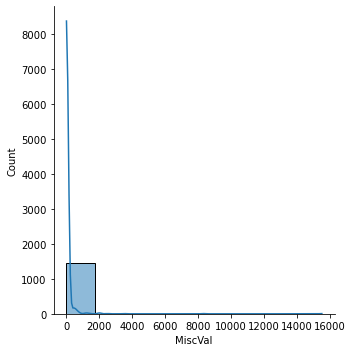

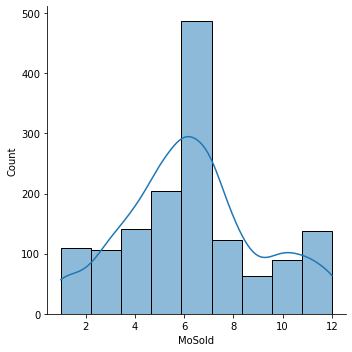

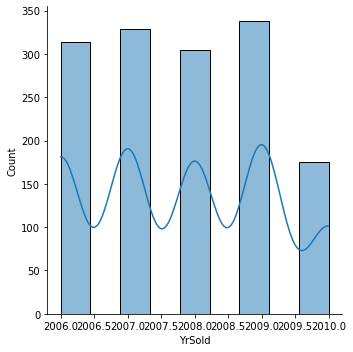

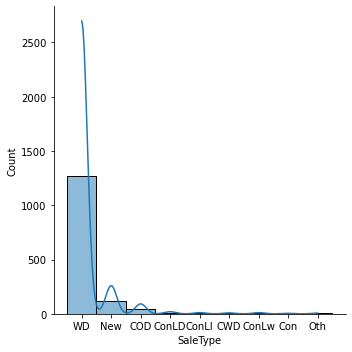

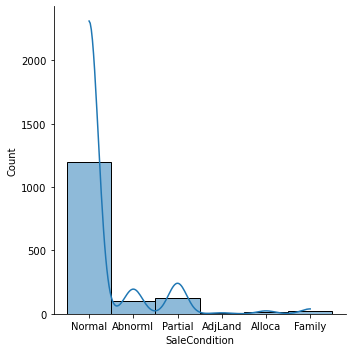

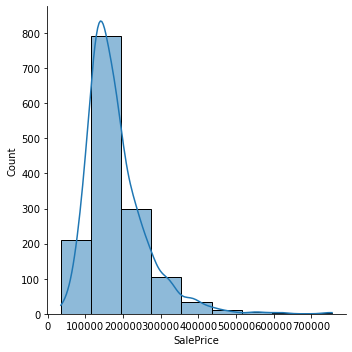

In [18]:
# Create subplots
fig, axes = plt.subplots(9, 9,  figsize=(2, 3))
fig.suptitle('Distribution of Variables', fontsize=12)
fig.tight_layout(rect=[0, 0, 1, 0.1])

# Flatten the axes 
axes = axes.flatten()

# Plot of each variable distribution
for i, column in enumerate(data.columns):
    sns.displot(data[column], ax=axes[i], kde=True, bins=9)
    axes[i].set_title(f'Distribution of {column}')
    
plt.show()

### Interpretation

Most of this dataset's variables don't follow normal distribution. We will proceed by normalization precisely standardization on these variables before applying the model.

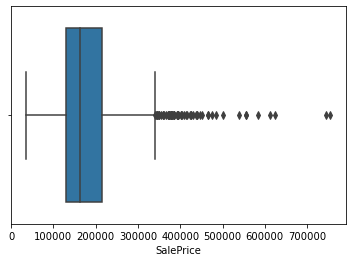

In [19]:
#Boxplot of predicted variable
sns.boxplot(data['SalePrice'])
plt.show()

### Comment

In this application, despite the fact that there are some outliers, we won't deal with them in order to avoid introducing of bias. For example, variable SalePrice depends on the whole characteristics of the house. Then, we will maintain these variables like that. 

In [20]:
#Correlation matrix

correlation_matrix = data.corr()
correlation_matrix

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.009921,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.051071,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.009921,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.178469,0.214367,...,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,0.006380,0.334771
LotArea,-0.033226,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.053281,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.116685,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.083348,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.051071,0.023573,0.178469,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.005024,-0.069836,0.214367,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [21]:
# Display qualitative columns
qualitative_columns = data.select_dtypes(include=['object', 'category']).columns
qualitative_columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')

In [22]:
qualitative_columns = list(qualitative_columns)

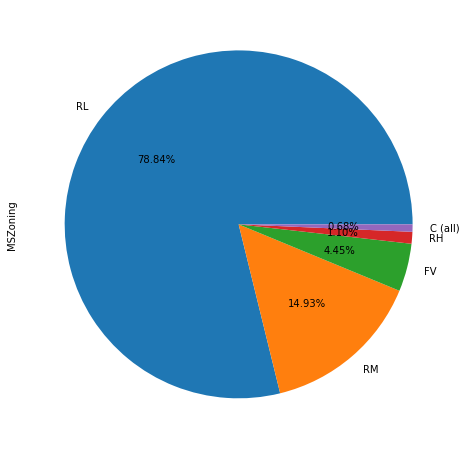

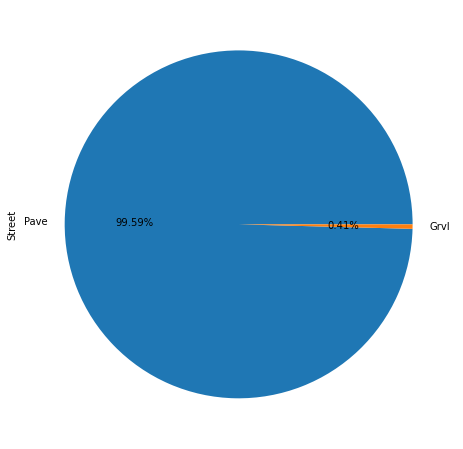

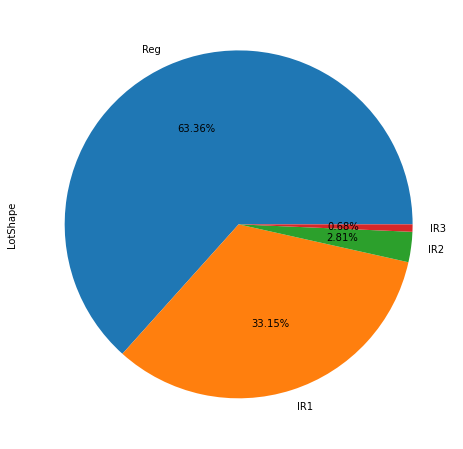

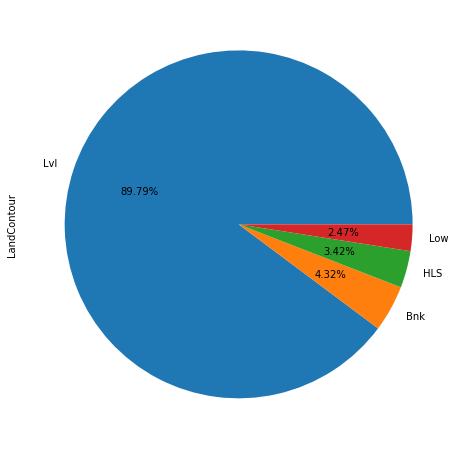

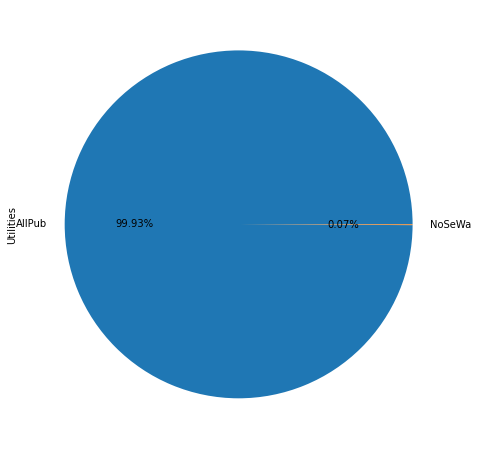

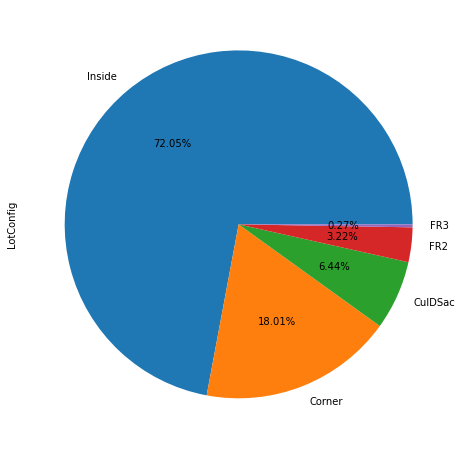

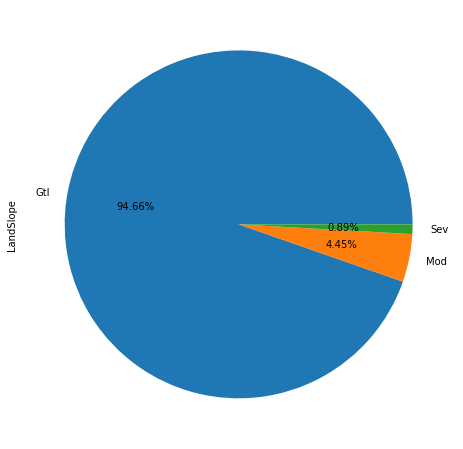

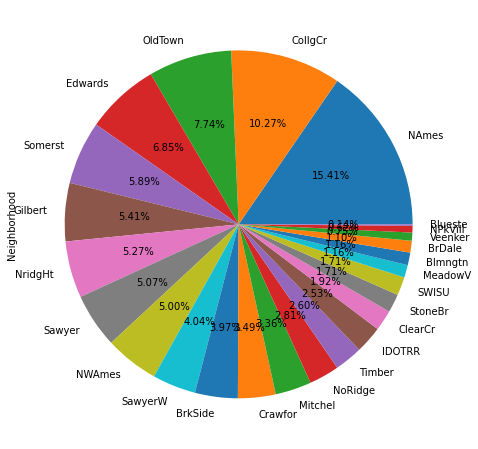

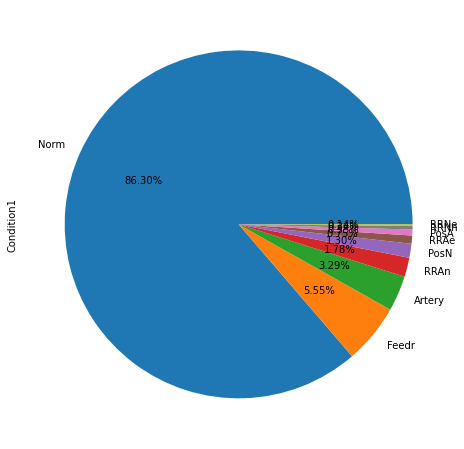

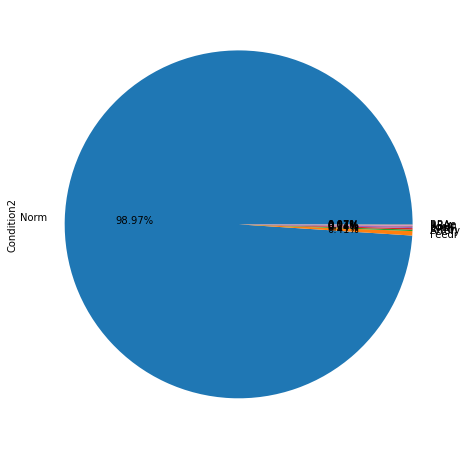

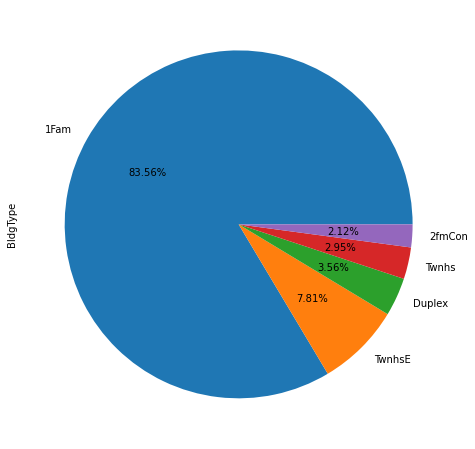

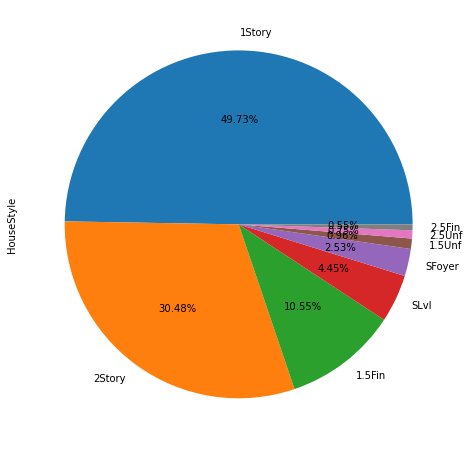

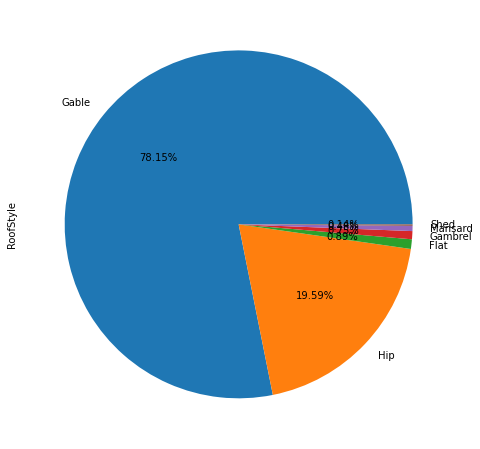

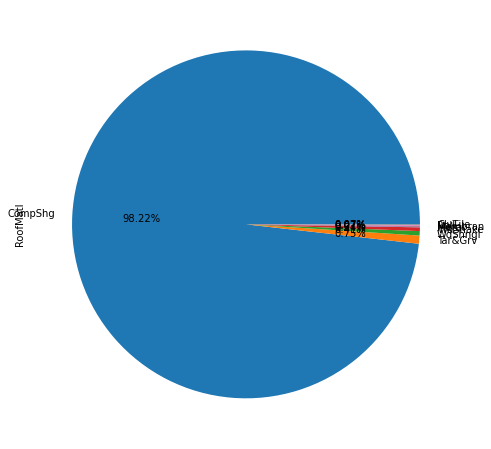

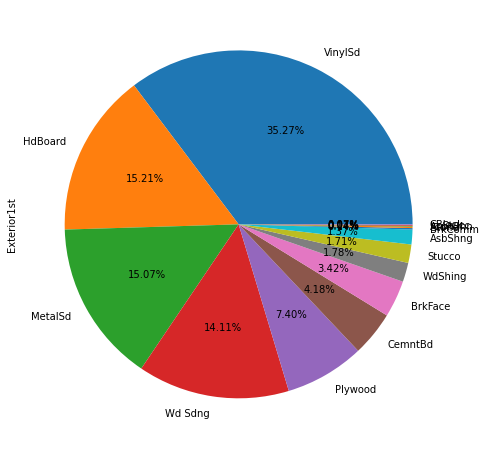

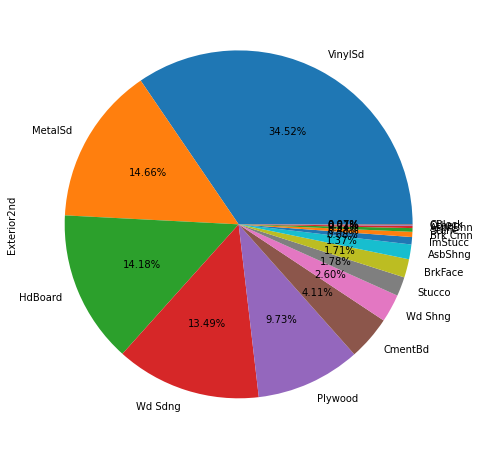

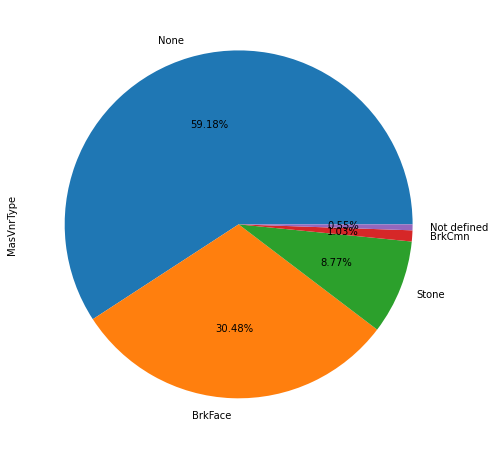

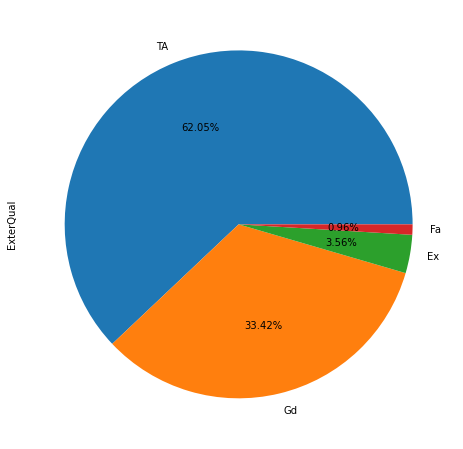

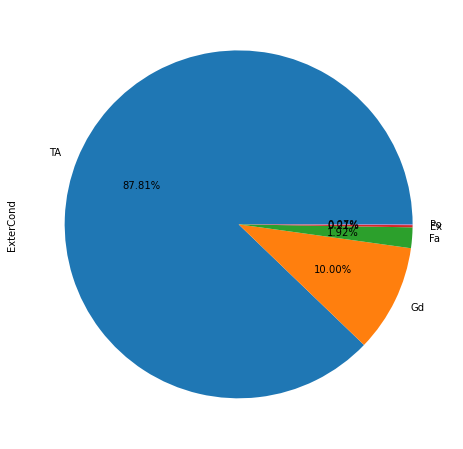

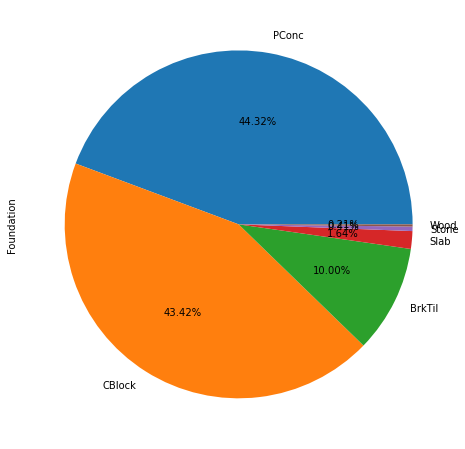

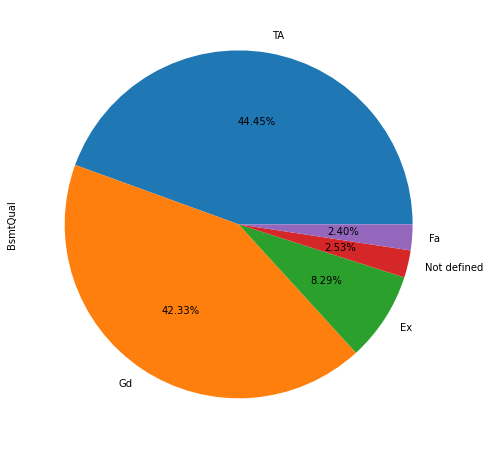

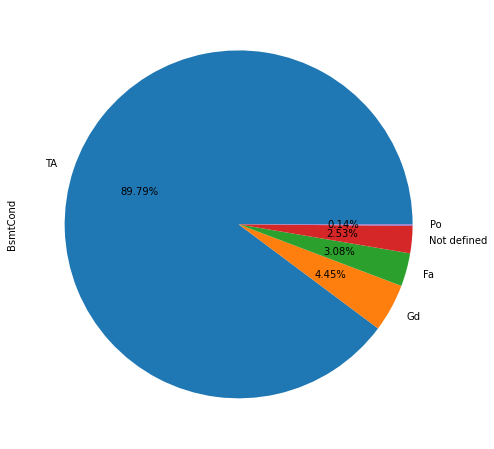

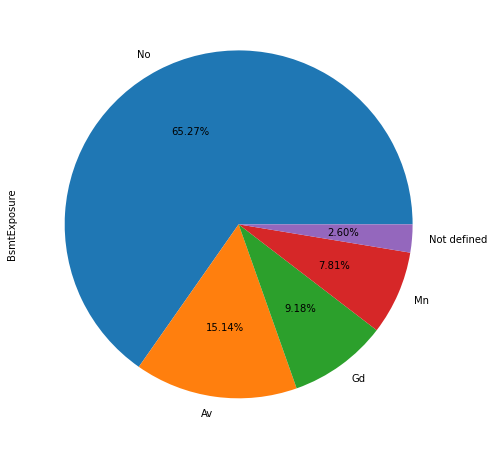

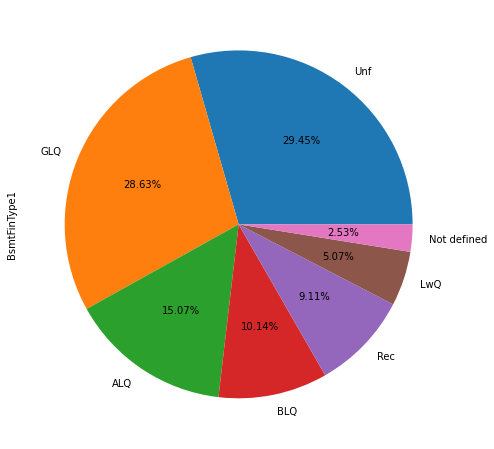

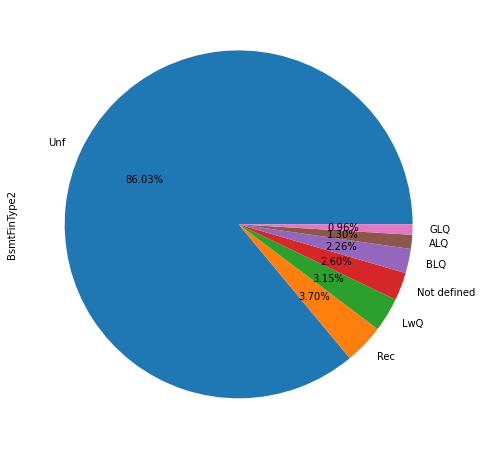

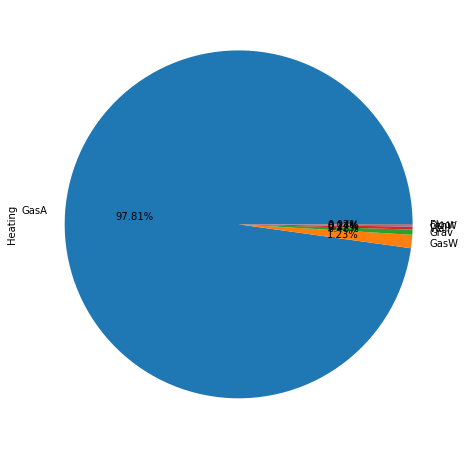

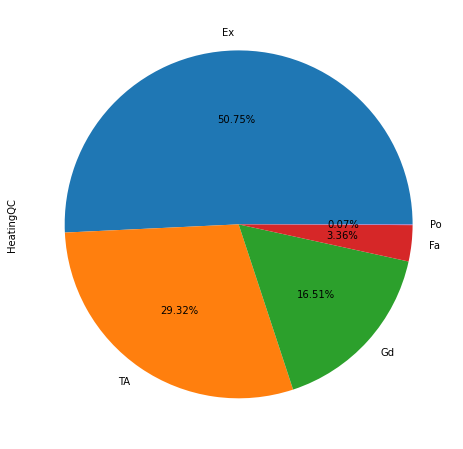

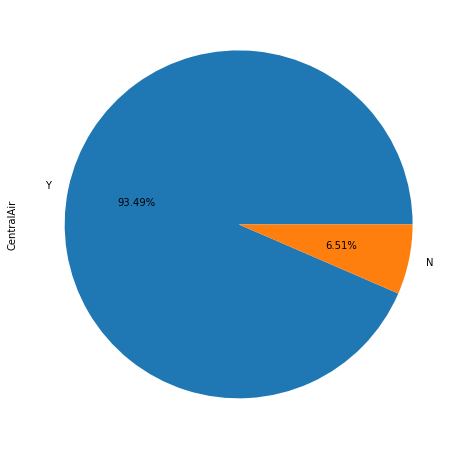

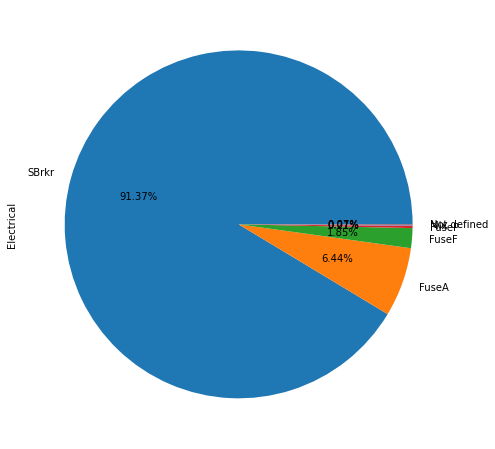

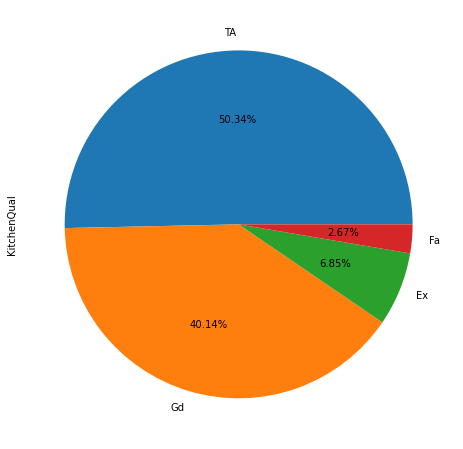

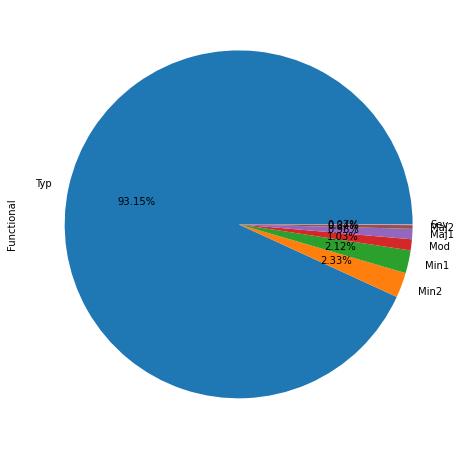

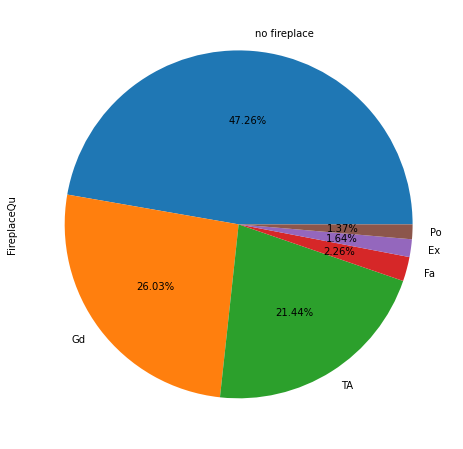

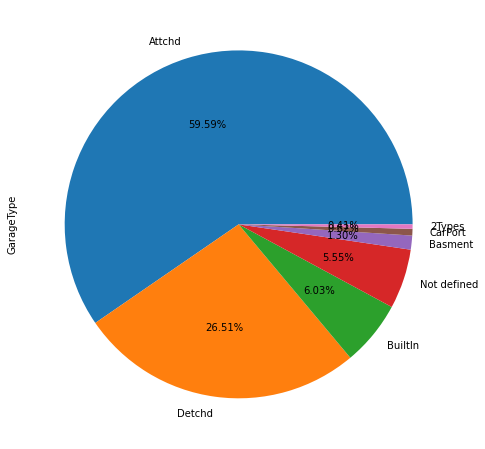

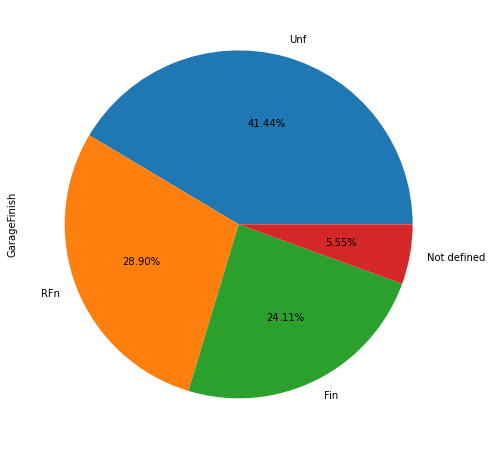

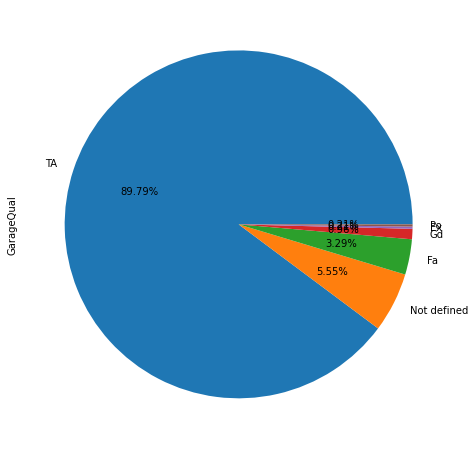

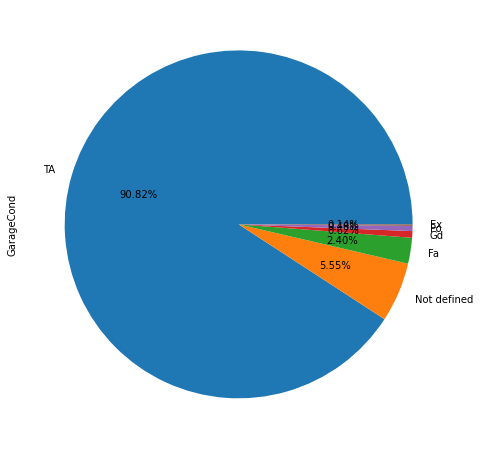

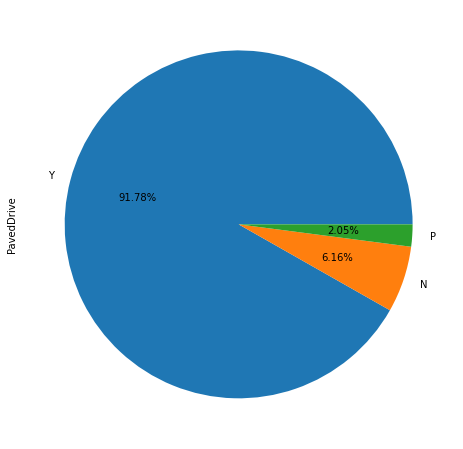

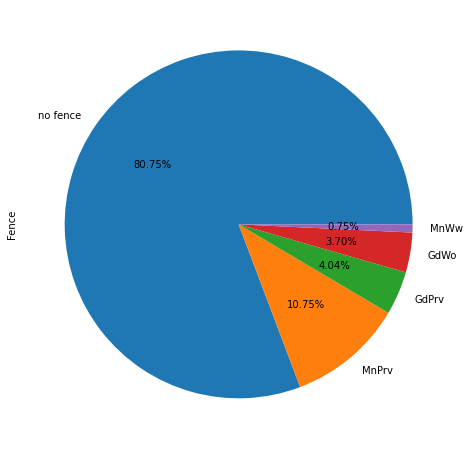

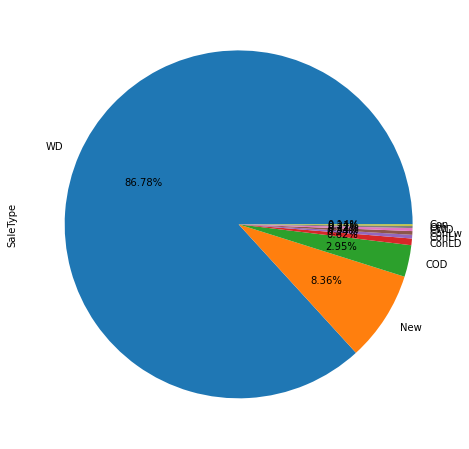

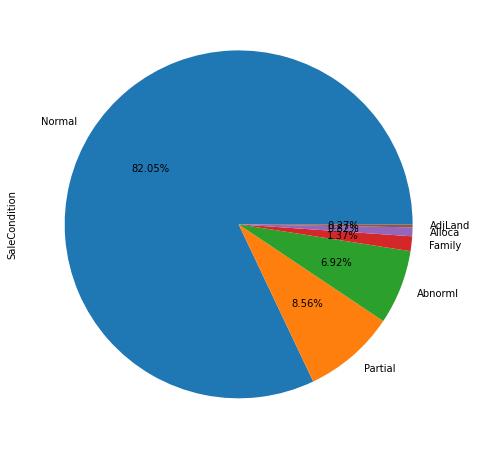

In [23]:
# Proportion of categorical variables
for col in qualitative_columns:
    plt.subplots(figsize=(8,8))
    data[col].value_counts().plot.pie(autopct = '%1.2f%%')

# 5- Modelling

Here, the target variables is SalePrice and the features are others variables of the dataset. There are 38 numerical variables on the 81 which are present in the dataset.

In [24]:
# #Encoding categorical variables
# label_encoder = LabelEncoder()
# data.encoded_columns = label_encoder.fit_transform(data[qualitative_columns])

In [25]:
# Split the data into features and target variable

X = data.drop("SalePrice", axis=1)
X = X.select_dtypes(include=np.number) # To select only numerical variables

y = data["SalePrice"] #Target variable

In [26]:
# Split in train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (1168, 37) (1168,)
Testing set shape: (292, 37) (292,)


### Comment: 

We split the dataset which is initially train_set because the test set data which is available seems to contain mistakes about unavailability of target variable and one row of whole dataset. 

In [27]:
# Standardize features using StandardScaler
scaler = StandardScaler()

# Fit and transform on training set
X_train_standardized = scaler.fit_transform(X_train)

# Transform test set using the same scaler
X_test_standardized = scaler.transform(X_test)

# Standardize target variable (optional, as some models don't require it)
y_train_standardized = scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_standardized = scaler.transform(y_test.values.reshape(-1, 1)).flatten()

### a- Linear Regression

In [28]:
# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train_standardized, y_train_standardized)

LinearRegression()

### Prediction of target variable

In [29]:
# Make predictions on the test set
y_pred = model.predict(X_test_standardized)

In [30]:
y_pred[0:15]

array([-0.35846309,  1.65726576, -0.88850365, -0.0125592 ,  1.46630971,
       -1.69290048,  0.67649489, -0.43098252, -1.72401949, -0.40925968,
       -0.3687078 , -0.87726227, -1.36719243,  0.40492813,  0.08345655])

In [31]:
y_test_standardized = y_test_standardized.astype(int)
y_pred = y_pred.astype(int)

In [32]:
# Calculate metrics
accuracy = accuracy_score(y_test_standardized, y_pred)
precision = precision_score(y_test_standardized, y_pred, average='weighted')
recall = recall_score(y_test_standardized, y_pred, average='weighted')

# Create a DataFrame to store the metrics
metrics_model = pd.DataFrame({
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall]
})

# Display the metrics DataFrame
print("Metrics for the model:")
print(metrics_model)

Metrics for the model:
   Accuracy  Precision    Recall
0  0.818493   0.822358  0.818493


In [33]:
# Display the confusion matrix
conf_matrix = confusion_matrix(y_test_standardized, y_pred)

print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[  0   0   0   0   0   0   0   0   0]
 [  2  26   3   0   0   0   0   0   0]
 [  0  18 193   7   0   0   0   0   0]
 [  0   0   9  20   0   0   0   0   0]
 [  0   0   0   8   0   0   0   0   0]
 [  0   0   0   0   3   0   0   0   0]
 [  0   0   0   0   1   0   0   0   0]
 [  0   0   0   0   1   0   0   0   0]
 [  0   0   0   0   0   1   0   0   0]]


### Comment

Even if values of metrics are acceptable in terms of quality of the model, the predicted values do not give the adequate values for house prices since they should be positive and similar to house prices. It is not the case here.

### b- Decision Trees

In [35]:
# Create a DecisionTreeRegressor
tree_regressor = DecisionTreeRegressor(random_state=42)

In [36]:
# Train the model
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [37]:
# Make predictions on the test set
y_pred = tree_regressor.predict(X_test)

In [38]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')#_standardized

# Create a DataFrame to store the metrics
metrics_model = pd.DataFrame({
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall]
})

# Display the metrics DataFrame
print("Metrics for the model:")
print(metrics_model)

Metrics for the model:
   Accuracy  Precision    Recall
0  0.003425   0.001712  0.003425


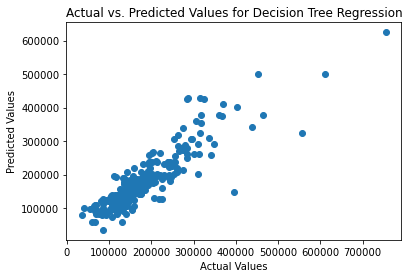

In [39]:
# Plot predictions vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for Decision Tree Regression')
plt.show()

In [40]:
y_pred[0:15]

array([154000., 424870., 109900., 220000., 325000.,  81000., 201800.,
       155000.,  80500., 138887., 163000., 100000., 120500., 201000.,
       179000.])

In [41]:
id_data = list(X_test['Id'])
y_pred_data = pd.DataFrame(y_pred)
y_pred_data.columns = ['house_predicted_prices']
y_pred_data["house_id"] = id_data
column_order = ['house_id', 'house_predicted_prices']
y_pred_data = y_pred_data[column_order]

print("The result of house-prices predictions on dataframe format is : ")
print("==========================================================================")
print(y_pred_data)

The result of house-prices predictions on dataframe format is : 
     house_id  house_predicted_prices
0         893                154000.0
1        1106                424870.0
2         414                109900.0
3         523                220000.0
4        1037                325000.0
..        ...                     ...
287       480                120000.0
288      1362                221000.0
289       803                184000.0
290       652                138887.0
291       723                125500.0

[292 rows x 2 columns]


### Comment

After performing decision tree model, despite the predicted values it gives, the values of metrcs which attest to the quality of model four our dataset are low.

### c-  Random Forest

In [42]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [43]:
# Fit the model on the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [44]:
# Predict on the testing data
y_pred = rf_classifier.predict(X_test)

In [45]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Create a DataFrame to store the metrics
metrics_model = pd.DataFrame({
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall]
})

# Display the metrics DataFrame
print("Metrics for the model:")
print(metrics_model)

Metrics for the model:
   Accuracy  Precision    Recall
0  0.010274   0.006164  0.010274


In [46]:
y_pred[0:15]

array([132500, 290000, 100000, 127000, 318000,  81000, 205000, 148500,
        81000, 135000, 149000, 100000, 105000, 190000, 179000],
      dtype=int64)

In [51]:
id_data = list(X_test['Id'])
y_pred_data = pd.DataFrame(y_pred)
y_pred_data.columns = ['house_predicted_prices']
y_pred_data["house_id"] = id_data
column_order = ['house_id', 'house_predicted_prices']
y_pred_data = y_pred_data[column_order]


print("The result of house-prices predictions on dataframe format is : ")
print("==========================================================================")
print(y_pred_data)

The result of house-prices predictions on dataframe format is : 
     house_id  house_predicted_prices
0         893                  132500
1        1106                  290000
2         414                  100000
3         523                  127000
4        1037                  318000
..        ...                     ...
287       480                  132000
288      1362                  259000
289       803                  188500
290       652                  177500
291       723                  120500

[292 rows x 2 columns]


In [52]:
y_pred_data.head()

,house_id,house_predicted_prices
0,893,132500
1,1106,290000
2,414,100000
3,523,127000
4,1037,318000


## Comment: 

Based on the predictions of this model, the houses with index 893, 1106, 414 for example, have the prices 132500, 290000 and 100000. 

### d- Gradient Boosting

In [53]:
# Initialize the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

In [55]:
# Fit the model on the training data
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [56]:
# Predict on the testing data
y_pred = gb_classifier.predict(X_test)

In [57]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Create a DataFrame to store the metrics
metrics_model = pd.DataFrame({
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall]
})

# Display the metrics DataFrame
print("Metrics for the model:")
print(metrics_model)

Metrics for the model:
   Accuracy  Precision    Recall
0  0.010274   0.002164  0.010274


In [58]:
y_pred[0:15]

array([128000, 167900, 100000, 170000, 194500,  81000, 190000, 179400,
       135960, 171000, 149000, 139900,  92900, 140000, 155000],
      dtype=int64)

In [59]:
id_data = list(X_test['Id'])
y_pred_data = pd.DataFrame(y_pred)
y_pred_data.columns = ['house_predicted_prices']
y_pred_data["house_id"] = id_data
column_order = ['house_id', 'house_predicted_prices']
y_pred_data = y_pred_data[column_order]

print("The result of house-prices predictions on dataframe format is : ")
print("==========================================================================")
print(y_pred_data)

The result of house-prices predictions on dataframe format is : 
     house_id  house_predicted_prices
0         893                  128000
1        1106                  167900
2         414                  100000
3         523                  170000
4        1037                  194500
..        ...                     ...
287       480                  140000
288      1362                  215000
289       803                  176000
290       652                  186500
291       723                  135000

[292 rows x 2 columns]


In [60]:
y_pred_data.head()

,house_id,house_predicted_prices
0,893,128000
1,1106,167900
2,414,100000
3,523,170000
4,1037,194500


## Comment: 

Based on the predictions of this model, the houses with index 893, 1106, 414 for example, have respectively the prices 128000, 167900 and 100000. 

### Comment:

To conclude, after performing linear regression, decision tree model, random forest model and gradient Boosting model, the one which is more performant in terms of prediction of house-prices is linear model. The accuracy of this model is 0.8184 meaning that the predictions that we get are similar to reality at 81.84%. Then, we can based on that to predict future house-prices following the considering criteria. 

# END